In [24]:
# This notebook introduces the basics of using the Lomb-Scargle period finding algorithm.

# Lomb-Scargle is an analog of the fourier transform, adapted to the non-equispaced sampling characteristic of astronomical time series

# Because the algorithm is an analog of a fourier transform, it is well suited to identifying periodic behavior with a strong sinusoidal component.

# Other algorithms, such as box least squares, are better adapted for other types of waveforms, but are often much more computationally expensive.

# First, we import the numerical python module (numpy)--further documentation can be found at https://numpy.org/

import numpy as np

# Now, we import the implemtnation of the algorithm included with astronomical python (astropy).
# While it is not the fastest implementation, one advantage of using the astropy version of the algorithm, is that it includes excellent documentation: https://docs.astropy.org/en/stable/timeseries/lombscargle.html

from astropy.timeseries import LombScargle

In [25]:
# Before unleashing the algorithm on real data, let us generate a synthetic signal to verify that the algorithm behaves as expected.

# First, we use numpy's random functionality (https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) to draw 200 samples from a uniform distribution spanning 100 days to simulate a random time series

t = np.random.uniform(0, 100, 200)

# And as a sanity check, we print the values.

print(t)

[50.41298303 18.30168805 96.98029811 89.15316021 69.67121823 30.20081328
 11.68986302  8.20562315 91.68679753 99.16508803 15.56610226 46.45400882
 73.41895533 63.00483507  3.29056886 50.70518818 80.61018119 43.23231088
 95.28044185 42.51301961 33.75050967 15.40810858 31.48670564 34.35351325
 99.84699568 17.75107973 88.57285178  4.74998732 40.34915409 90.62841972
  4.30662719 57.87310363 65.41763491 56.34888467  0.8224664  51.17837574
  0.75192339 37.86910467 88.94192788 86.35551412 15.56290256 72.19933051
 70.28380302 73.3765438  54.85446775 52.26882891 44.64736254 26.50941858
 18.16764181 42.31540952 74.23464888 68.53704633 14.01241757 37.14695952
 86.37267545 17.91296841 45.23523376 53.25217357 38.46015371 80.1398411
 97.68662582 32.86402895 98.27806567 27.73967843 89.77513563 25.71512143
 47.04634209 20.40147307 15.95653634  4.50424106 55.83417698 85.75372525
 55.04341537 59.79208057 49.06244487 15.64311334 76.94146342 44.11530595
 95.48071839 45.64652085 14.07838775 55.60613918  6.

In [26]:
# Now that we have our random timestamps, we need to simulate the flux values at these timestamps.

# To test the algorithm, let us work with two sets of flux values, one corresponding to a sinusoidal waveform, and the other to no signal


# For the sinusoid of period p, we have flux values:
p = 0.24353234
amplitude = 1
flux = amplitude * np.sin(2 * np.pi / p * t)

# And for the constant signal

flux_const = np.zeros(len(t))

# As always, let us print the arrays to check thing are behaving as expected

print(flux)
print(flux_const)

[ 0.04613108  0.8125312   0.98615862  0.5006569   0.51499712  0.07225804
  0.00801602 -0.93912882  0.08062771  0.94032761 -0.49267902 -0.99998462
  0.15533525 -0.9722165  -0.07429474  0.96406903  0.02519513 -0.13684
  0.99916275 -0.41592654 -0.52187151  0.99269407  0.96590234  0.38821935
 -0.03259849 -0.63727549 -0.95216431 -0.02854891 -0.91253763  0.7753376
 -0.91525459 -0.77180029 -0.68412831  0.67752232  0.69709901  0.80984252
  0.52287884  0.00449441  0.97738172 -0.56557822 -0.56275812  0.20514886
 -0.59547504  0.94904551  0.99952727 -0.71976912  0.8690171  -0.79478578
 -0.59047966 -0.99907698 -0.89213594  0.4318421  -0.23784716 -0.21194597
 -0.86437207 -0.33745457 -0.99973138 -0.86302436 -0.44687475  0.44098491
  0.7019055  -0.3251743  -0.3234543  -0.55936519 -0.76011505 -0.54757319
  0.91305025 -0.98943314 -0.13294243  0.02856284  0.99359835  0.70528065
  0.13136874 -0.12585682  0.2381885   0.99509757 -0.37157818  0.8001706
  0.40215019  0.39627873 -0.93182129  0.87128857 -0.9602

In [27]:
# Ok, now in order to make things a bit more realistic, we must add scatter to the data. We can again use numpy's random funcationality for this.

# We will add gaussian scatter corresponding to a standard deviation of 0.2.

flux = flux + np.random.normal(0, 0.2, len(flux))

flux_const = flux_const + np.random.normal(0, 0.2, len(flux))

# The algorithm weights each measurement according to its measurement uncertainty. Since we just generated scatter with a uniform uncertainty, our array of weights will be constant.

# Here the 0.2 represents the sigma we used to generate the noise

uncertainty = 0.2

# Since all uncertainties are the same, we can pass a scalar to the algorithm, but we could also pass an array of uncertainties if these were not uniform (which is typically the real case)

0.24353667311474597


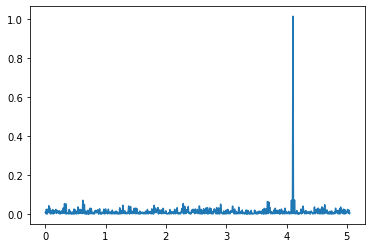

In [33]:
# Now, let's try and run the algorithm!

# First, let's try it on our real signal with a period of 1.

frequency, power = LombScargle(t, flux, uncertainty).autopower()

import matplotlib.pyplot as plt

# Now, let's plot the power spectrum

plt.plot(frequency, power)

# We see a strong peak, but it doesn't correspond to the period we selected. This is because the x axis is in units of frequency

# Let's find the value of the peak:

best_freq = frequency[np.argmax(power)]

best_period = 1 / best_freq

print(best_period)

# Nice, it matches!

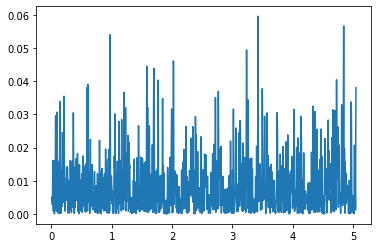

In [38]:
# As a sanity check, let's try the same on our constant signal

frequency, power = LombScargle(t, flux_const, uncertainty).autopower()

plt.plot(frequency, power)

# We see that there is no significant peak in this data.

# Before moving onto the next module working with real data, it is instructive to play with the amplitude of the signal, the sampling candence, etc, to see how it impacts the power spectrum returned by the algorithm.